# Importing data to a first dataframe for data exploration

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv('openfoodfacts.tsv' , sep='\t', low_memory = False)


In [3]:
pd.set_option('display.max_columns', None)   # Using this option to show all columns of this dataframe

In [4]:
df.head()

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,packaging,packaging_tags,brands,brands_tags,categories,categories_tags,categories_en,origins,origins_tags,manufacturing_places,manufacturing_places_tags,labels,labels_tags,labels_en,emb_codes,emb_codes_tags,first_packaging_code_geo,cities,cities_tags,purchase_places,stores,countries,countries_tags,countries_en,ingredients_text,allergens,allergens_en,traces,traces_tags,traces_en,serving_size,no_nutriments,additives_n,additives,additives_tags,additives_en,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_from_palm_oil_tags,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,ingredients_that_may_be_from_palm_oil_tags,nutrition_grade_uk,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,states,states_tags,states_en,main_category,main_category_en,image_url,image_small_url,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
0,0000000003087,http://world-en.openfoodfacts.org/product/0000...,openfoodfacts-contributors,1474103866,2016-09-17T09:17:46Z,1474103893,2016-09-17T09:18:13Z,Farine de blé noir,NaN,1kg,NaN,NaN,Ferme t'y R'nao,ferme-t-y-r-nao,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,en:FR,en:france,France,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","To be completed,Nutrition facts to be complete...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0000000004530,http://world-en.openfoodfacts.org/product/0000...,usda-ndb-import,1489069957,2017-03-09T14:32:37Z,1489069957,2017-03-09T14:32:37Z,Banana Chips Sweetened (Whole),NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,US,en:united-states,United States,"Bananas, vegetable oil (coconut oil, cor

### At first glance, we can see a lot of columns, even numerical ones, seem to have NaN values. We will further check on those

In [5]:
print('Number of colums in Dataframe : ', len(df.columns))
print('Number of rows in Dataframe : ', len(df.index))

Number of colums in Dataframe :  163
Number of rows in Dataframe :  356027


In [6]:
df.dtypes

code                                     object
url                                      object
creator                                  object
created_t                                object
created_datetime                         object
last_modified_t                          object
last_modified_datetime                   object
product_name                             object
generic_name                             object
quantity                                 object
packaging                                object
packaging_tags                           object
brands                                   object
brands_tags                              object
categories                               object
categories_tags                          object
categories_en                            object
origins                                  object
origins_tags                             object
manufacturing_places                     object
manufacturing_places_tags               

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 356027 entries, 0 to 356026
Columns: 163 entries, code to water-hardness_100g
dtypes: float64(107), object(56)
memory usage: 442.8+ MB


### _What can we say :_  It looks like we have 56 columns which are "qualitative" (categorical) data (objects, probably strings) and 107 are float which could be used for further numerical analysis.

In [8]:
describe_df = df.describe()
describe_df

,no_nutriments,additives_n,ingredients_from_palm_oil_n,ingredients_from_palm_oil,ingredients_that_may_be_from_palm_oil_n,ingredients_that_may_be_from_palm_oil,nutrition_grade_uk,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-butyric-acid_100g,-caproic-acid_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-lignoceric-acid_100g,-cerotic-acid_100g,-montanic-acid_100g,-melissic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-elaidic-acid_100g,-gondoic-acid_100g,-mead-acid_100g,-erucic-acid_100g,-nervonic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
count,0.0,283867.000000,283867.000000,0.0,283867.000000,0.0,0.0,295367.000000,869.000000,2.794970e+05,263823.000000,0.0,0.0,1.0,2.000000,4.000000,1.0,1.0,1.0,27.000000,26.000000,0.0,0.0,1.0,0.0,23040.000000,23075.000000,938.000000,201.000000,43.000000,89.000000,207.000000,159.000000,9.000000,27.000000,26.000000,25.000000,15.000000,0.0,1.600000e+01,0.0,0.0,0.0,143443.000000,144170.000000,2.792200e+05,279186.000000,85.000000,32.000000,44.000000,278.000000,6.00000,11.000000,291.000000,451.000000,2.206830e+05,2.941610e+05,29.000000,17.000000,9.000000,289739.000000,289694.000000,4577.000000,137706.000000,35.000000,7207.000000,1472.000000,930.000000,141060.000000,11277.000000,10925.000000,11831.000000,6897.000000,5330.000000,3046.000000,5.390000e+03,331.000000,2551.000000,73.000000,99.000000,24848.000000,198.000000,141517.000000,5938.000000,140660.000000,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,91.000000,33.000000,52.000000,3228.000000,404.000000,182.000000,1383.000000,0.0,278.000000,254856.000000,254856.000000,0.0,0.0
mean,NaN,1.876851,0.023430,NaN,0.059736,NaN,NaN,1125.453320,587.216617,5.606587e+04,5.092460,NaN,NaN,7.4,6.040000,36.136182,18.9,8.1,3.0,10.383852,10.265385,NaN,NaN,61.0,NaN,10.501218,6.372548,3.476176,2.200218,2.805791,1.581979,18.734295,12.463013,0.051344,0.158230,0.063246,41.243200,26.053333,NaN,1.343750e-06,NaN,NaN,NaN,0.073487,0.020065,5.614020e+04,15.673428,12.822353,2.864063,24.836364,6.007263,17.10000,12.163636,30.943230,49.098894,3.843467e+05,5.326598e+04,4.398966,2.400000,0.021678,1.941281,0.764401,8.278337,0.000398,0.503896,0.000008,0.053610,0.033854,0.023394,0.332167,0.256490,0.020410,0.046952,0.006820,0.205586,2.741797e-04,0.000134,0.069210,0.433009,0.132496,0.424284,0.079895,0.127284,0.613267,0.003791,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,2.075503,12.262055,6.476138,33.392680,60.360124,15.362637,52.102675,NaN,335.790664,9.166137,8.980656,NaN,NaN
std,NaN,2.501022,0.153094,NaN,0.280660,NaN,NaN,936.825952,713.255708,2.9

What is the proportion of missing values per column/row? Should you keep, fill or remove these missing values? What would be the implications?
--------------------------------------------


In [9]:
df.isnull().sum().sum()

44183489

### Out of 58 Millions data, 44 millions are Null (75%)... we cannot drop or replace them all..We would lose almost all data which could make sense. We have to look more in detail.

In [10]:
df.isnull().sum(axis =0).mean()    # averge null value per column (271064 / 356027 = 76%)

271064.34969325154

In [11]:
df.isnull().sum(axis = 1).mean()   # average null per row (124/163 = 76%)

124.10151196398026

## Above we can see an average of 76% of Null Values in the dataset. It is huge, but it still means we have possibly 10 millions data that can be useful. 

## Let's clean a little :

In [12]:
# columns with at least on Null value
df.isnull().any(axis=0).sum()

161

In [13]:
# columns with ONLY Null value
df.isnull().all(axis=0).sum()

16

## 161 out of 163 columns at least have "one" Null value ; 16 of them, even are completely "empty" and we should drop them.

## Let's do the same with rows : 

In [14]:
df.isnull().any(axis=1).sum()

356027

In [15]:
df.isnull().all(axis=1).sum()

0

### All rows at least have one Null value, but none is completely Null. Which makes sense as we have 2 columns which are completely filled. (as seen later : 'last modified' and 'last modified datetime')

We can drop the columns fully "Null" as no data would be lost in this dataset

In [16]:
df2 = df.dropna(how='all', axis=1);   # dropping the 16 columns fully Null

In [17]:
df2.isnull().all(axis=0).sum()    # checking no column is fully Null in df2 dataframe

0

In [18]:
df2.shape

(356027, 147)

In [19]:
# df3 = df2.dropna(thresh = 3 , axis= 'index') # remove rows with 1 or 2 non-Null values only (which are columns 'last modified' and 'last modified datetime')
# df3.shape

### I could not find the way to drop these rows using "thresh" in dropna() method..

### For the rest of the data we are keeping, it would not make sense to fill the number columns with "0" as we cannot make an assumption based on the following, or previous values... or even with a mean values as all food in the dataset can be completely different from one another. 

**Replacing by 0 would change all the data average, quartiles, median....but we can try and observe how different the mean/min/max/median values are impacted**


In [20]:
set(df2.dtypes)

{dtype('float64'), dtype('O')}

In [21]:
# select numeric columns
numeric_columns = df2.select_dtypes(np.number).columns


In [22]:
# fill 0 to all NaN 
def fill_na(df,value,list_column):
    df = df.copy()
    for column in list_column:
        df.loc[:,column] = df[column].fillna(value)
        
    return df

df3 = fill_na(df2,0,numeric_columns);


In [23]:
df3.shape

(356027, 147)

In [24]:
df3.isnull().sum().sum()   # check how many null data left ==> 10 millions instead of 44 million.

10964229

In [25]:
describe_df3 = df3.describe()

In [26]:
print('Number of colums in Dataframe : ', len(describe_df3.columns))
print('Number of rows in Dataframe : ', len(describe_df3.index))

Number of colums in Dataframe :  91
Number of rows in Dataframe :  8


In [27]:
 # comparing one column to the original dataframe to notice big impact on statistic values

In [28]:
describe_df['energy_100g'] - describe_df3['energy_100g']  # original dataframe description - new fillna=0 dataframe

count   -60660.000000
mean       191.755115
std        -15.618937
min          0.000000
25%        236.000000
50%        305.000000
75%        105.000000
max          0.000000
Name: energy_100g, dtype: float64

As we can see, df3 numerical data are really different from our original dataframe df. That's why I would rather work with NaN missing values which do not modify statistics we can measure !!! And in this column "only 60'660 rows" have been filled with 0 instead of NaN.


## Let's stick to the original dataframe, with deleted columns : df2

# 1 - What can we see in numerical data ?

What are the mean/min/max/median values of numerical columns? Do you spot any issue from analyzing those statistics? ex. a negative amount of sugar, a maximum value extremely far from the 75% percentile (outlier?)

In [29]:
describe_df2 = df2.describe()
describe_df2

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,283867.000000,283867.000000,283867.000000,295367.000000,869.000000,2.794970e+05,263823.000000,1.0,2.000000,4.000000,1.0,1.0,1.0,27.000000,26.000000,1.0,23040.000000,23075.000000,938.000000,201.000000,43.000000,89.000000,207.000000,159.000000,9.000000,27.000000,26.000000,25.000000,15.000000,1.600000e+01,143443.000000,144170.000000,2.792200e+05,279186.000000,85.000000,32.000000,44.000000,278.000000,6.00000,11.000000,291.000000,451.000000,2.206830e+05,2.941610e+05,29.000000,17.000000,9.000000,289739.000000,289694.000000,4577.000000,137706.000000,35.000000,7207.000000,1472.000000,930.000000,141060.000000,11277.000000,10925.000000,11831.000000,6897.000000,5330.000000,3046.000000,5.390000e+03,331.000000,2551.000000,73.000000,99.000000,24848.000000,198.000000,141517.000000,5938.000000,140660.000000,6392.000000,3964.000000,2122.000000,1639.000000,99.000000,1181.000000,23.000000,20.000000,288.000000,91.000000,33.000000,52.000000,3228.000000,404.000000,182.000000,1383.000000,278.000000,254856.000000,254856.000000
mean,1.876851,0.023430,0.059736,1125.453320,587.216617,5.606587e+04,5.092460,7.4,6.040000,36.136182,18.9,8.1,3.0,10.383852,10.265385,61.0,10.501218,6.372548,3.476176,2.200218,2.805791,1.581979,18.734295,12.463013,0.051344,0.158230,0.063246,41.243200,26.053333,1.343750e-06,0.073487,0.020065,5.614020e+04,15.673428,12.822353,2.864063,24.836364,6.007263,17.10000,12.163636,30.943230,49.098894,3.843467e+05,5.326598e+04,4.398966,2.400000,0.021678,1.941281,0.764401,8.278337,0.000398,0.503896,0.000008,0.053610,0.033854,0.023394,0.332167,0.256490,0.020410,0.046952,0.006820,0.205586,2.741797e-04,0.000134,0.069210,0.433009,0.132496,0.424284,0.079895,0.127284,0.613267,0.003791,0.531415,0.007921,0.025613,0.003165,0.010042,0.003098,0.001478,0.000230,0.000465,2.075503,12.262055,6.476138,33.392680,60.360124,15.362637,52.102675,335.790664,9.166137,8.980656
std,2.501022,0.153094,0.280660,936.825952,713.255708,2.963385e+07,7.965148,NaN,0.226274,24.101433,NaN,NaN,NaN,3.939718,3.388090,NaN,16.789189,10.930572,8.665162,7.778110,13.114442,1.981251,32.590392,110.915670,0.029298,0.030498,0.011144,25.061032,25.545541,4.643544e-07,1.539417,0.357963,2.964854e+07,21.983635,15.164302,5.881463,29.313796,13.986130,17.80719,8.372129,24.834337,33.116098,1.805529e+08,2.888578e+07,3.027864,2.162175,0.003072,120.545973,47.462729,10.968414,0.073239,2.524722,0.000356,0.662779,1.024723,2.234928

### We can visually notice that most numerical columns with "enough" non null data (at least 100 000) seem to have big outliers far from 75% percentile or Mean + 3 STD

### We can also see some negatives data, let's check this : 

In [30]:
(describe_df2.min()<0)

additives_n                                False
ingredients_from_palm_oil_n                False
ingredients_that_may_be_from_palm_oil_n    False
energy_100g                                False
energy-from-fat_100g                       False
fat_100g                                   False
saturated-fat_100g                         False
-caprylic-acid_100g                        False
-capric-acid_100g                          False
-lauric-acid_100g                          False
-myristic-acid_100g                        False
-palmitic-acid_100g                        False
-stearic-acid_100g                         False
-arachidic-acid_100g                       False
-behenic-acid_100g                         False
-montanic-acid_100g                        False
monounsaturated-fat_100g                   False
polyunsaturated-fat_100g                   False
omega-3-fat_100g                           False
-alpha-linolenic-acid_100g                 False
-eicosapentaenoic-ac

In [31]:
(describe_df2.min()<0).sum()

13

### We can see here : 13 columns have negatives (example above : Iron, Silica...) which is not possible for a cumulative value. However nutrition score also is sometimes negatives, but seems more sensible based on how it is calculated.

### Let's compute a way to replace negative values by 0 except the last columns : "nutrition_score_..."

In [32]:
numeric_columns = df2.select_dtypes(np.number).columns
numeric_cumulative = numeric_columns[0:-2]   # keeps only columns with cumulative value, means we don't take nutrition_scores

In [33]:
def change_negatives(df, value, list_column):
    df=df.copy()
    for column in list_column:
        df[df[column] < 0] = 0        
    return df

df_no_negatives = change_negatives(df2,0,numeric_cumulative);
df_no_negatives.describe().round(2)

,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,energy_100g,energy-from-fat_100g,fat_100g,saturated-fat_100g,-caprylic-acid_100g,-capric-acid_100g,-lauric-acid_100g,-myristic-acid_100g,-palmitic-acid_100g,-stearic-acid_100g,-arachidic-acid_100g,-behenic-acid_100g,-montanic-acid_100g,monounsaturated-fat_100g,polyunsaturated-fat_100g,omega-3-fat_100g,-alpha-linolenic-acid_100g,-eicosapentaenoic-acid_100g,-docosahexaenoic-acid_100g,omega-6-fat_100g,-linoleic-acid_100g,-arachidonic-acid_100g,-gamma-linolenic-acid_100g,-dihomo-gamma-linolenic-acid_100g,omega-9-fat_100g,-oleic-acid_100g,-gondoic-acid_100g,trans-fat_100g,cholesterol_100g,carbohydrates_100g,sugars_100g,-sucrose_100g,-glucose_100g,-fructose_100g,-lactose_100g,-maltose_100g,-maltodextrins_100g,starch_100g,polyols_100g,fiber_100g,proteins_100g,casein_100g,serum-proteins_100g,nucleotides_100g,salt_100g,sodium_100g,alcohol_100g,vitamin-a_100g,beta-carotene_100g,vitamin-d_100g,vitamin-e_100g,vitamin-k_100g,vitamin-c_100g,vitamin-b1_100g,vitamin-b2_100g,vitamin-pp_100g,vitamin-b6_100g,vitamin-b9_100g,folates_100g,vitamin-b12_100g,biotin_100g,pantothenic-acid_100g,silica_100g,bicarbonate_100g,potassium_100g,chloride_100g,calcium_100g,phosphorus_100g,iron_100g,magnesium_100g,zinc_100g,copper_100g,manganese_100g,fluoride_100g,selenium_100g,chromium_100g,molybdenum_100g,iodine_100g,caffeine_100g,taurine_100g,ph_100g,fruits-vegetables-nuts_100g,fruits-vegetables-nuts-estimate_100g,collagen-meat-protein-ratio_100g,cocoa_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g
count,283878.00,283878.00,283878.00,295378.00,900.00,2.795080e+05,263837.00,32.00,33.00,35.00,32.00,32.00,32.00,47.00,46.00,32.00,23067.00,23102.00,969.00,232.00,72.00,109.00,238.00,190.00,40.00,47.00,46.00,56.00,46.00,37.0,143458.00,144185.00,2.792310e+05,279200.00,116.00,63.00,75.00,309.00,37.00,42.00,322.00,482.00,2.206990e+05,2.941630e+05,60.00,48.00,40.00,289750.00,289705.00,4608.00,137721.00,66.00,7237.00,1503.00,961.00,141075.00,11307.00,10955.00,11856.00,6927.00,5360.00,3077.00,5420.00,362.00,2571.00,93.00,130.00,24877.00,229.00,141532.00,5969.00,140676.00,6423.00,3994.00,2152.00,1670.00,130.00,1211.00,54.00,51.0,319.00,122.00,64.00,83.00,3259.00,435.00,213.00,1414.00,309.0,254873.00,254873.00
mean,1.88,0.02,0.06,1125.35,566.99,5.606366e+04,5.09,0.23,0.37,4.13,0.59,0.25,0.09,4.33,4.25,1.91,10.49,6.36,3.36,1.91,1.66,0.86,16.29,10.43,0.01,0.05,0.02,18.41,8.50,0.0,0.07,0.02,5.613799e+04,15.67,9.40,1.45,14.57,5.40,2.77,3.19,27.96,45.94,3.843189e+05,5.326562e+04,2.13,0.85,0.00,1.94,0.76,8.22,0.00,0.27,0.00,0.05,0.03,0.02,0.33,0.26,0.02,0.05,0.01,0.20,0.00,0.00,0.07,0.47,0.10,0.42,0.07,0.13,0.61,0.00,0.53,0.01,0.03,0.00,0.01,0.00,0.00,0.0,0.00,1.55,6.32,4.06,33.08,56.06,13.13,50.96,302.1,9.17,8.98
std,2.50,0.15,0.28,936.85,708.99,2.963326e+07,7.96,1.31,1.46,13.69,3.34,1.43,0.53,6.41,6.19,10.78,16.78,10.93,8.55,7.28,10.18,1.63,31.03,101.52,0.03,0.07,0.03,26.50,18.85,0.0,1.54,0.36,2.964796e+07,21.98,14.16,4.40,25.51,13.39,9.21,6.81,25.31,34.23,1.805463e+08,2.888568e+07,3.04,1.71,0.01,120.54,47.46,10.95,0.07,1.84,0.00,0.66,1.01,2.23,2.62,1.27,0.32,1.66,0.33,5.10,0.02,0.00,1.45,1.13,0.19,12.50,0.13,3.35,11.93,0.22,13.33,0.08,0.89,0.03,0.05,0.10,0.00,0.0,0.00,6.72,49.99,3.53,32.91,32.20,6.41,20.31,413.9,9.00,9.15
min,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.000000e+00,0.000000e+00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,-15.00,-15.00
25%,0.00,0.00,0.00,381.00,35.45,1.000000e-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.50,0.05,0.00,0.00,1.09,0.35,0.00,0.00,0.00,0.00,0.00,0.0,0.00,

In [34]:
(df_no_negatives.describe().min()<0).sum()   # we indeed have kept the only Minimum < 0 for Nutrition_Scores

2

### This function seems a bit "heavy" as the "for loop" goes through each column, but eventually it works

### From now on. we will work from this dataframe : df_no_negatives
It has 
- no negative values for cumulative numerical data
- deleted all 16 columns totally "Null" which bring no useful information
- size : 356027 rows x 147 columns (56objects columns + 91 non null numeric columns)

**I don't think we need to go further on cleaning at this point as we do not know yet what to analyze.**

# Outliers ?

As said earlier, we can suppose from the describe() method, that we have **important outliers on almost each column** but we don't know how many. Let's compute this with the z-score function

We might need to work on a lighter numerical dataframe, I visually chose some numerical columns based on the number of values filled properly (counts) and their names (I know Protein, Fat or Vitamins, Iron.. is more relevant than Maltodextrine)
Then I came about a "Threshold" of 100'000 to drop numerical columns : indeed I want to keep most of Object columns so far.

In [35]:
# zfilter_df = np.abs(df_no_negatives - df_no_negatives.mean()) > (3 * df_no_negatives.std())

In [36]:
df_light_num = df_no_negatives.select_dtypes(np.number).dropna(thresh = 100000, axis = 1) # filter "interesting" columns
df_light_num.columns

Index(['additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'energy_100g', 'fat_100g',
       'saturated-fat_100g', 'trans-fat_100g', 'cholesterol_100g',
       'carbohydrates_100g', 'sugars_100g', 'fiber_100g', 'proteins_100g',
       'salt_100g', 'sodium_100g', 'vitamin-a_100g', 'vitamin-c_100g',
       'calcium_100g', 'iron_100g', 'nutrition-score-fr_100g',
       'nutrition-score-uk_100g'],
      dtype='object')

I will make a new Df with all string data and a part of numerical data which i consider interesting

In [37]:
df_light_object = df_no_negatives.select_dtypes(object)   # df of all object columns, i want to keep them all as they can bring more info
df_light_object.columns

Index(['code', 'url', 'creator', 'created_t', 'created_datetime',
       'last_modified_t', 'last_modified_datetime', 'product_name',
       'generic_name', 'quantity', 'packaging', 'packaging_tags', 'brands',
       'brands_tags', 'categories', 'categories_tags', 'categories_en',
       'origins', 'origins_tags', 'manufacturing_places',
       'manufacturing_places_tags', 'labels', 'labels_tags', 'labels_en',
       'emb_codes', 'emb_codes_tags', 'first_packaging_code_geo', 'cities',
       'cities_tags', 'purchase_places', 'stores', 'countries',
       'countries_tags', 'countries_en', 'ingredients_text', 'allergens',
       'allergens_en', 'traces', 'traces_tags', 'traces_en', 'serving_size',
       'additives', 'additives_tags', 'additives_en',
       'ingredients_from_palm_oil_tags',
       'ingredients_that_may_be_from_palm_oil_tags', 'nutrition_grade_fr',
       'pnns_groups_1', 'pnns_groups_2', 'states', 'states_tags', 'states_en',
       'main_category', 'main_category_en', 'i

In [38]:
df_light = pd.concat([df_light_object, df_light_num] , axis = 1)   # concatenate both dataframes

df_light.shape # lighter dataframe with "only" 20 numerical columns

(356027, 76)

## Energy as first example

**As a first example, I will choose energy_100g.** (based on the values we can see, I suppose this energy to be in kj, which makes sense as 100g of Fat is approximately 3700 kj, and the max shown for energy_from_fat_100g is about very close (3830))

**However, we see that in energy_100g the max is : 231 199 kj which is more than an outlier, it is just not possible as Fat is the maximum achievable for a 100 grams : 3700 kj. Could be a unit conversion problems but anyway we have to get rid of these "false" data.**

Let us check the outliers for this column :

C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\numpy\lib\histograms.py:754: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
C:\Users\Utilisateur\anaconda3v2\envs\exts-ml\lib\site-packages\numpy\lib\histograms.py:755: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


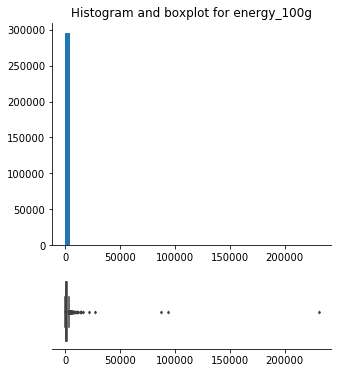

In [39]:
# plot the energy distribution : 

fig, axes = plt.subplots(2, 1, gridspec_kw={"height_ratios": (0.75, 0.25)}, figsize=(5, 6))

axes[0].hist(df_light['energy_100g'], bins=50)
axes[0].set_title("Histogram and boxplot for energy_100g")
sns.despine(ax=axes[0])

sns.boxplot(df_light['energy_100g'], ax=axes[1], fliersize=2)
axes[1].set(yticks=[])
sns.despine(ax=axes[1], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

## As we could foresee in the describe() method, this plot cannot be "readable" because of outliers. I will compute a zscore type filter to remove the outliers and check their numbers. 
(in the case of energy, as i said earlier, a 100g cannot bring more than arount 3700 kj, so I can directly filter with this value, but let's do it properly with the zscore method as we will use it also for other columns.

In [40]:
zfilter_out = np.abs(df_light['energy_100g'] - df_light['energy_100g'].mean()) > (3 * df_light['energy_100g'].std())


In [41]:
df_light[zfilter_out]['energy_100g'] # show outlier values based on mean +/- 3 std 

812         4435.0
5494        5690.0
14529       4335.0
15791       5439.0
19815       4184.0
19816       4184.0
20221      10757.0
27821       4707.0
28083       6975.0
35422       6276.0
35605      13213.0
35663       6694.0
35669       6694.0
47299      14644.0
56217       4184.0
56218       4707.0
56245       5577.0
56328       4184.0
56930       5054.0
66627      10966.0
80340       4033.0
81131      11954.0
90568       4184.0
92760       4184.0
94693       5577.0
94694       5577.0
97374       4318.0
101765      4657.0
101766      4657.0
105750      6849.0
            ...   
255156      4356.0
256949      4184.0
264569      4071.0
265172      4092.0
265786      4485.0
272243      6276.0
273690      6063.0
276541      4180.0
283116      3966.0
293643      8715.0
299007      5732.0
302227      9623.0
305256      6017.0
311559      5874.0
311656      5870.0
313377      3975.0
313379      4184.0
319252      4210.0
323240      4689.0
325098      8400.0
336680      3979.0
339709      

In [42]:
upper_limit = df_light['energy_100g'].mean() + 3 * df_light['energy_100g'].std()  # check the outlier limit
upper_limit.round(0)

3936.0

### We notice 124 rows that can be removed for this "energy_100g" column which is reasonable as we have almost 300'000 values for this column
**--> We also notice, that the upper limit  (3936 kj) is really close to the 3700 kj threshold I estimated earlier, which is a good news by the way.**

In [43]:
zfilter_out_index = zfilter_out.loc[zfilter_out == True].index   #list of index of Outliers

In [44]:
df_light_outliers = df_light.drop(zfilter_out.loc[zfilter_out == True].index, axis = 0 )

Let's plot the same with for example the nutrition-score-fr_100g too

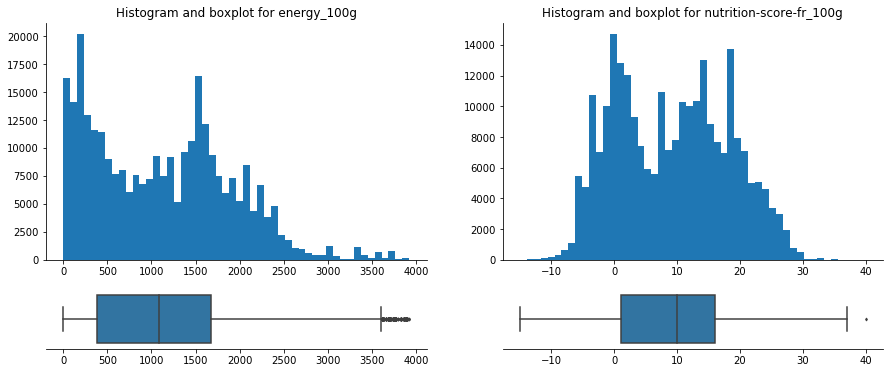

In [45]:

# 2 subplots
fig, axes = plt.subplots(
    2, 2, gridspec_kw={"height_ratios": (0.8, 0.2)}, figsize=(15, 6)
)

for (feat, plot_col) in zip(
    ["energy_100g", "nutrition-score-fr_100g"], [0, 1]  # pairing feature with column in plot
):
    axes[0, plot_col].hist(df_light_outliers[feat], bins=50)
    axes[0, plot_col].set_title("Histogram and boxplot for {}".format(feat))
    sns.despine(ax=axes[0, plot_col])
    sns.boxplot(df_light_outliers[feat], ax=axes[1, plot_col], fliersize=2)
    axes[1, plot_col].set(yticks=[])
    sns.despine(ax=axes[1, plot_col], left=True)

for ax in axes.flatten():
    ax.set_xlabel("")

plt.show()

## We can see we successfuly dropped the outliers for "energy_100g" and the distribution looks way more interesting. It almost looks like we have possibly two Gaussian distribution added together for energy and nutrition_score : 
##           - one centered on 0 and the other on +13 => it would be interesting to find why in further analysis in part B


# We shoud remove outliers now for each numerical column (20 in my current df) and check how many rows should be removed.

In [46]:
# np.abs(stats.zscore(df_light_outliers))

In [47]:
#z_score = df_light_num[np.abs(stats.zscore(df_light_num))<3]
# z_score

In [48]:
numeric_columns_outliers = df_light_outliers.select_dtypes(np.number).columns
zfilter_out_index =[]
def detect_outliers(df,num_col)
    list_index = []
    for col in num_col:          # check outliers in numeric_columns list
        zfilter = np.abs(df[col] - df[col].mean()) > (3 * df[col].std())
        

SyntaxError: unexpected EOF while parsing (<ipython-input-48-be04fc599b00>, line 3)